<a href="https://colab.research.google.com/github/suchethana/Web-Technology/blob/master/hashtag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 58805, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 58805 (delta 68), reused 81 (delta 35), pack-reused 58690
Receiving objects: 100% (58805/58805), 573.35 MiB | 31.21 MiB/s, done.
Resolving deltas: 100% (40838/40838), done.


In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
!protoc object_detection/protos/string_int_label_map.proto --python_out=.

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 26.98 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
cd cocoapi/PythonAPI

/content/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/models/research/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.7/dist-packages/n

In [ ]:
cp -r pycocotools /content/models/research

In [ ]:
cd /content/models/research

/content/models/research


In [ ]:
cp object_detection/packages/tf2/setup.py .

In [ ]:
!python -m pip install .

Processing /content/models/research
     |████████████████████████████████| 9.7MB 8.2MB/s 
     |████████████████████████████████| 358kB 33.2MB/s 
     |████████████████████████████████| 1.6MB 15.1MB/s 
     |████████████████████████████████| 153kB 46.0MB/s 
     |████████████████████████████████| 829kB 18.3MB/s 
     |████████████████████████████████| 2.3MB 37.4MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 37.2MB 69kB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 686kB 31.4MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 1.2MB 28.2MB/s 
     |████████████████████████████████| 102kB 11.0MB/s 
     |████████████████████████████████| 215kB 40.1MB/s 
     |████████████████████████████████| 645kB 33.1MB/s 
  Created wheel for object-detection: filename=object_detection-0.1-cp37-none-any.whl size=1658716 sha256=154d452691e140b90998a01df5

In [ ]:
!python object_detection/builders/model_builder_tf2_test.py

2021-07-16 14:58:37.993038: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Running tests under Python 3.7.10: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-16 14:58:40.892567: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2021-07-16 14:58:40.997361: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-07-16 14:58:40.997429: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (4167010a9932): /proc/driver/nvidia/version does not exist
W0716 14:58:41.271957 139945630963584 model_builder.py:1088] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.73s
I0716 14:58

Loading model...
Done
['#horses', '#photography', '#horselove', '#horsebackriding', '#ride'] ['#person', '#photography', '#portrait', '#people', '#life', '#photographer']


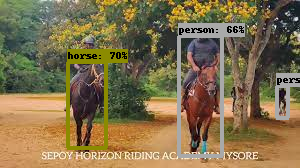

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/trainingdemo/images/google/2.jfif'

# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/trainingdemo/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/trainingdemo/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "/content/trainingdemo/exported_models/my_model" + "/saved_model"

print('Loading model...')

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))

def pred_hashtag():
  a = classes[detections['detection_classes'][0]]
  b = classes[detections['detection_classes'][1]]
  c = classes[detections['detection_classes'][2]]
  if a==b==c:
    print(hashtags[a])
  elif a==b:
    print(hashtags[a], hashtags[c])
  elif a==c:
    print(hashtags[b], hashtags[c])
  else:
    print(hashtags[a], hashtags[b])


image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

input_tensor = tf.convert_to_tensor(image)

input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.6,
      agnostic_mode=False)

print('Done')
pred_hashtag()
cv2_imshow(image_with_detections)

In [ ]:
print(category_index)

{1: {'id': 1, 'name': 'aeroplane'}, 2: {'id': 2, 'name': 'bicycle'}, 3: {'id': 3, 'name': 'boat'}, 4: {'id': 4, 'name': 'bus'}, 5: {'id': 5, 'name': 'car'}, 6: {'id': 6, 'name': 'motorbike'}, 7: {'id': 7, 'name': 'train'}, 8: {'id': 8, 'name': 'bottle'}, 9: {'id': 9, 'name': 'chair'}, 10: {'id': 10, 'name': 'diningtable'}, 11: {'id': 11, 'name': 'pottedplant'}, 12: {'id': 12, 'name': 'sofa'}, 13: {'id': 13, 'name': 'tvmonitor'}, 14: {'id': 14, 'name': 'bird'}, 15: {'id': 15, 'name': 'cat'}, 16: {'id': 16, 'name': 'cow'}, 17: {'id': 17, 'name': 'dog'}, 18: {'id': 18, 'name': 'horse'}, 19: {'id': 19, 'name': 'sheep'}, 20: {'id': 20, 'name': 'person'}}


In [ ]:
def pred_hashtag():
  a = classes[detections['detection_classes'][0]]
  b = classes[detections['detection_classes'][1]]
  c = classes[detections['detection_classes'][2]]
  if a==b==c:
    print(hashtags[a])
  elif a==b:
    print(hashtags[a], hashtags[c])
  elif a==c:
    print(hashtags[b], hashtags[c])
  else:
    print(hashtags[a], hashtags[b])

In [ ]:
classes = ['0', 'aeroplane','bicycle','boat','bus','car','motorbike','train','bottle','chair','diningtable','pottedplant','sofa','tvmonitor','bird','cat','cow','dog','horse','sheep','person']

In [ ]:
hashtags = {}

In [ ]:
hashtags['aeroplane'] = ['#plane', '#aviation', '#avgeek', '#airplane', '#airport', '#travel', '#planespotting']
hashtags['bicycle'] = ['#bicycle', '#bike', '#cycling', '#bikelife', '#bikes',  '#cyclinglife', '#ride' ]
hashtags['boat'] = ['#boat', '#ocean', '#travel', '#water', '#summer', '#sea', '#beach', '#boating']
hashtags['bus'] = ['#bus', '#buses', '#travel', '#autobus', '#busspotting', '#buslovers', '#busspotter']
hashtags['car'] = ['#cars', '#car', '#photography', '#auto', '#automobile', '#carlifestyle']
hashtags['motorbike'] = ['#motorcycles', '#bikelife', '#moto', '#biker','#bike']
hashtags['train'] = ['#railfanning', '#trainphotography', '#trainspotter', '#railways', '#railroads']
hashtags['bottle'] = ['#bottleart', '#wine', '#instagood', '#drink', '#drinks']
hashtags['chair'] = ['#chairs', '#interiordesign', '#furniture', '#homedecor', '#wood', '#modern' ,'#style']
hashtags['diningtable'] = ['#diningtable', '#interiordesign', '#diningroom', '#furniture', '#homedecor', '#decor']
hashtags['pottedplant'] = ['#pottedplant', '#cactuslove', '#indoor', '#vignettes']
hashtags['sofa'] = ['#sofa', '#furniture', '#interiordesign', '#design', '#homedecor', '#home', '#livingroom']
hashtags['tvmonitor'] = ['#tv','#television','#entertainment','#fun','#laptop','#pcbuild','rtx']
hashtags['bird'] = ['#bird', '#nature', '#birds', '#naturephotography', '#wildlife', '#photography']
hashtags['cat'] = ['#cats', '#catstagram', '#kitty', '#kitten', '#meow','#catoftheday']
hashtags['cow'] = ['#cows', '#farmlife', '#dairy', '#jersey', '#animals', '#vegan']
hashtags['dog'] = ['#dogs' ,'#puppy', '#cute', '#dogstagram', '#doglover', '#dogoftheday', '#pet ']
hashtags['horse'] = ['#horses','#photography', '#horselove', '#horsebackriding', '#ride']
hashtags['sheep'] = ['#sheep', '#animals', '#farm', '#lamb', '#nature', '#farmlife', '#wool']
hashtags['person'] = ['#person', '#photography', '#portrait', '#people', '#life', '#photographer']

